In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.layers import Dropout,Dense
from sklearn.model_selection import RandomizedSearchCV
from keras import regularizers      #for l2 regularization
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.layers import Activation

In [40]:
banknotes=pd.read_csv('banknotes (1).csv')

In [41]:
banknotes

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


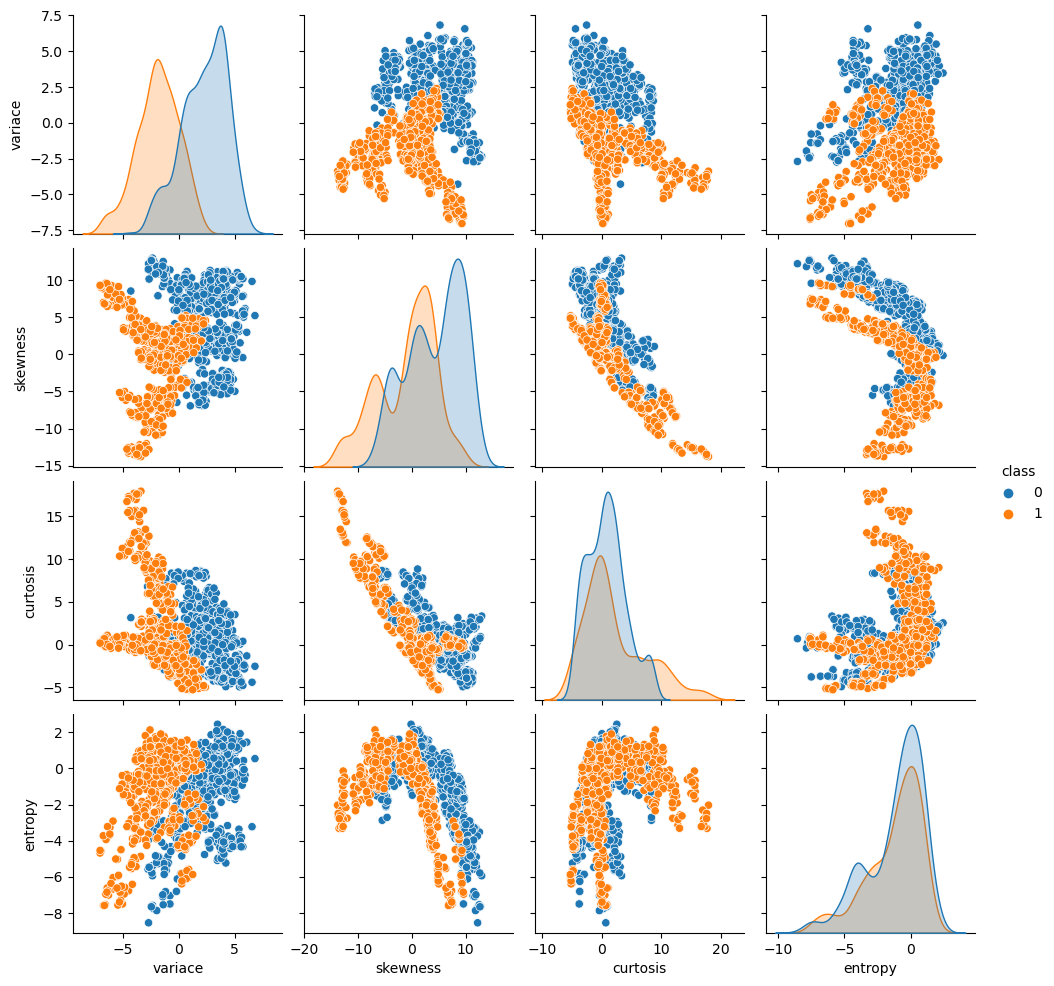

In [42]:
sns.pairplot(banknotes,hue='class')
plt.show()

In [43]:
banknotes.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [44]:
print('Observations per class: \n', banknotes['class'].value_counts())

Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [45]:
y=banknotes.iloc[:,-1]
X = banknotes.iloc[:,:-1]

In [46]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# Create a new sequential model
model= Sequential()
# Add and input and dense layer
model.add(Dense(10,input_shape=(4,),activation='relu'))
# Add a final 1 neuron layermodel.
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_259 (Dense)           (None, 10)                50        
                                                                 
 dense_260 (Dense)           (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Compiling your previously built model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
# Train your model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
29/29 [==============================] - 0s 1ms/step - loss: 0.8791 - accuracy: 0.4342
Epoch 2/5
29/29 [==============================] - 0s 1ms/step - loss: 0.7431 - accuracy: 0.5299
Epoch 3/5
29/29 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.5702
Epoch 4/5
29/29 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.6126
Epoch 5/5
29/29 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.6627


In [51]:
# Predict on new data
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

15/15 [==============================] - 0s 859us/step


In [52]:
# Evaluate your results
accuracy_train=model.evaluate(X_train, y_train)
accuracy_test=model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.6954


In [53]:
print('Train Accuracy:',accuracy_train)

Train Accuracy: [0.46173569560050964, 0.7159956693649292]


In [54]:
print('Test Accuracy:',accuracy_test)

Test Accuracy: [0.4815019965171814, 0.695364236831665]


In [55]:
history=model.fit(X_train,y_train,epochs=5,batch_size=32,verbose=0,validation_data=(X_test,y_test))

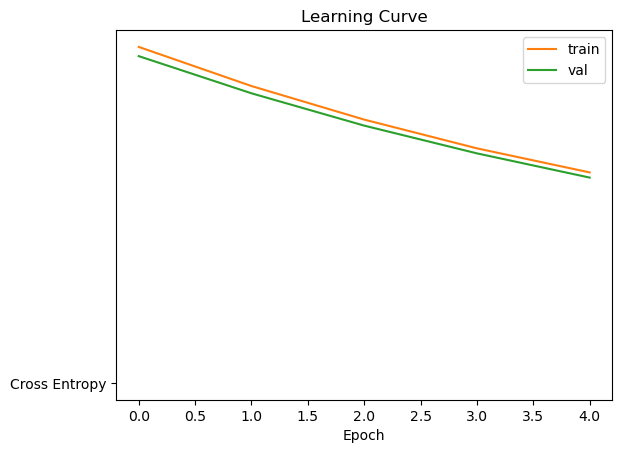

In [56]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

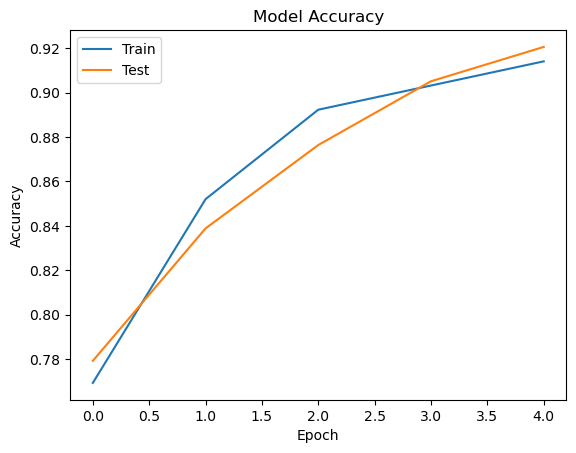

In [57]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [58]:
# Create a new sequential model
model_0= Sequential()
# Add and input and dense layer
model_0.add(Dense(10,kernel_initializer='he_normal',input_shape=(4,),activation='relu'))
model_0.add(BatchNormalization())
# Add a final 1 neuron layermodel.
model_0.add(Dense(1,activation='sigmoid'))

In [59]:
# Compiling your previously built model
model_0.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model_0.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_261 (Dense)           (None, 10)                50        
                                                                 
 batch_normalization_52 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_262 (Dense)           (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 81
Non-trainable params: 20
_________________________________________________________________


In [61]:
early_stopping=EarlyStopping(monitor='val_score',patience=5)

In [62]:
model_save=ModelCheckpoint('best_model.hdf5',save_best_only=True,verbose=1,mode='max')

In [63]:
history_model_0=model_0.fit(X_train,y_train,epochs=50,batch_size=32,verbose=0,validation_data=(X_test,y_test),callbacks=[early_stopping,model_save])


Epoch 1: val_loss improved from -inf to 0.53398, saving model to best_model.hdf5

Epoch 2: val_loss did not improve from 0.53398

Epoch 3: val_loss did not improve from 0.53398

Epoch 4: val_loss did not improve from 0.53398

Epoch 5: val_loss did not improve from 0.53398

Epoch 6: val_loss did not improve from 0.53398

Epoch 7: val_loss did not improve from 0.53398

Epoch 8: val_loss did not improve from 0.53398

Epoch 9: val_loss did not improve from 0.53398

Epoch 10: val_loss did not improve from 0.53398

Epoch 11: val_loss did not improve from 0.53398

Epoch 12: val_loss did not improve from 0.53398

Epoch 13: val_loss did not improve from 0.53398

Epoch 14: val_loss did not improve from 0.53398

Epoch 15: val_loss did not improve from 0.53398

Epoch 16: val_loss did not improve from 0.53398

Epoch 17: val_loss did not improve from 0.53398

Epoch 18: val_loss did not improve from 0.53398

Epoch 19: val_loss did not improve from 0.53398

Epoch 20: val_loss did not improve from 0.5


Epoch 42: val_loss did not improve from 0.53398

Epoch 43: val_loss did not improve from 0.53398

Epoch 44: val_loss did not improve from 0.53398

Epoch 45: val_loss did not improve from 0.53398

Epoch 46: val_loss did not improve from 0.53398

Epoch 47: val_loss did not improve from 0.53398

Epoch 48: val_loss did not improve from 0.53398

Epoch 49: val_loss did not improve from 0.53398

Epoch 50: val_loss did not improve from 0.53398


In [64]:
# Predict on new data
y_train_preds = model_0.predict(X_train)
y_test_preds = model_0.predict(X_test)

15/15 [==============================] - 0s 838us/step


In [65]:
# Evaluate your results
accuracy_train_model_0=model_0.evaluate(X_train, y_train)
accuracy_test_model_0=model_0.evaluate(X_test, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 1.0000


In [66]:
print('Train Accuracy:',accuracy_train_model_0)

Train Accuracy: [0.014676935970783234, 1.0]


In [67]:
print('Train Accuracy:',accuracy_test_model_0)

Train Accuracy: [0.01769373193383217, 1.0]


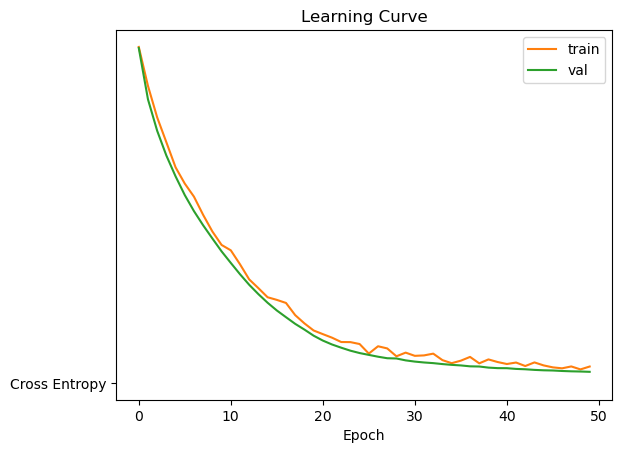

In [68]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history_model_0.history['loss'],label='train')
plt.plot(history_model_0.history['val_loss'],label='val')
plt.legend()
plt.show()

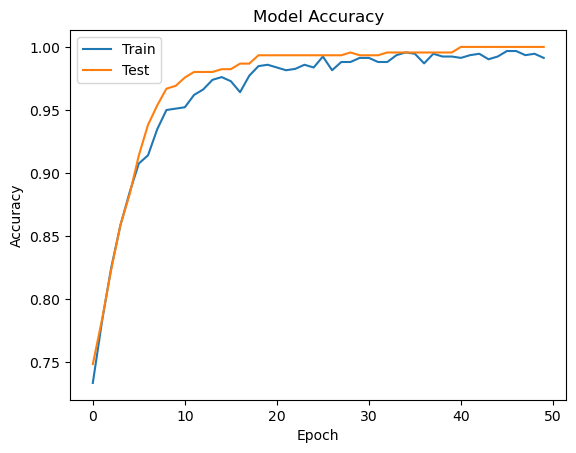

In [69]:
plt.figure()
plt.plot(history_model_0.history['accuracy'])
plt.plot(history_model_0.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [115]:
def create_model(optimizer="rmsprop", lr=0.01, kernel_initializer="glorot_uniform"):
    model = Sequential()
    model.add(Dense(10, input_shape=(4,)))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model


In [116]:
model = KerasClassifier(model=create_model, lr=None, optimizer=None)
params = {"optimizer": ["adam",'sgd'], "lr": [0.01,0.001],'batch_size': [32, 128, 256], 
          'epochs': [10, 20, 30,40,50]}
search = RandomizedSearchCV(model, params)
search.fit(X_train, y_train)

Epoch 1/40
3/3 [==============================] - 1s 3ms/step - loss: 1.0668 - accuracy: 0.3796
Epoch 2/40
3/3 [==============================] - 0s 3ms/step - loss: 1.0216 - accuracy: 0.3946
Epoch 3/40
3/3 [==============================] - 0s 4ms/step - loss: 0.9938 - accuracy: 0.4014
Epoch 4/40
3/3 [==============================] - 0s 4ms/step - loss: 0.9641 - accuracy: 0.4109
Epoch 5/40
3/3 [==============================] - 0s 4ms/step - loss: 0.9472 - accuracy: 0.4177
Epoch 6/40
3/3 [==============================] - 0s 4ms/step - loss: 0.9220 - accuracy: 0.4218
Epoch 7/40
3/3 [==============================] - 0s 3ms/step - loss: 0.9065 - accuracy: 0.4354
Epoch 8/40
3/3 [==============================] - 0s 3ms/step - loss: 0.8864 - accuracy: 0.4449
Epoch 9/40
3/3 [==============================] - 0s 3ms/step - loss: 0.8666 - accuracy: 0.4558
Epoch 10/40
3/3 [==============================] - 0s 4ms/step - loss: 0.8511 - accuracy: 0.4599
Epoch 11/40
3/3 [======================

3/3 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.6299
Epoch 5/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.6449
Epoch 6/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.6585
Epoch 7/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6639
Epoch 8/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.6816
Epoch 9/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5983 - accuracy: 0.6966
Epoch 10/40
3/3 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7143
Epoch 11/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7238
Epoch 12/40
3/3 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7374
Epoch 13/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7578
Epoch 14/40
3/3 [==============================

3/3 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7948
Epoch 8/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.8125
Epoch 9/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.8207
Epoch 10/40
3/3 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.8329
Epoch 11/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.8424
Epoch 12/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8451
Epoch 13/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8478
Epoch 14/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.8573
Epoch 15/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8655
Epoch 16/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8723
Epoch 17/40
3/3 [===========================

3/3 [==============================] - 0s 2ms/step - loss: 0.7789 - accuracy: 0.4966
Epoch 11/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7692 - accuracy: 0.5075
Epoch 12/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7543 - accuracy: 0.5075
Epoch 13/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.5265
Epoch 14/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7296 - accuracy: 0.5320
Epoch 15/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5347
Epoch 16/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.5483
Epoch 17/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5646
Epoch 18/40
3/3 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.5714
Epoch 19/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.5687
Epoch 20/40
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.5796
Epoch 14/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5918
Epoch 15/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6000
Epoch 16/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6150
Epoch 17/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.6204
Epoch 18/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.6435
Epoch 19/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6408
Epoch 20/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.6585
Epoch 21/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.6694
Epoch 22/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5989 - accuracy: 0.6871
Epoch 23/40
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.8826 - accuracy: 0.4735
Epoch 17/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.4844
Epoch 18/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.4952
Epoch 19/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8336 - accuracy: 0.5197
Epoch 20/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8176 - accuracy: 0.5238
Epoch 21/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8003 - accuracy: 0.5306
Epoch 22/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7849 - accuracy: 0.5497
Epoch 23/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.5510
Epoch 24/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7536 - accuracy: 0.5687
Epoch 25/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.5687
Epoch 26/50
3/3 [=========================

1/1 [==============================] - 0s 53ms/step
Epoch 1/50
3/3 [==============================] - 1s 3ms/step - loss: 0.9022 - accuracy: 0.4585
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8657 - accuracy: 0.4762
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.4748
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.4816
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.4912
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7871 - accuracy: 0.4884
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.4966
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7580 - accuracy: 0.4993
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7433 - accuracy: 0.5075
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7304 - accu

3/3 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7483
Epoch 34/50
3/3 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.7605
Epoch 35/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7687
Epoch 36/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7782
Epoch 37/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7864
Epoch 38/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.8041
Epoch 39/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.8095
Epoch 40/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.8204
Epoch 41/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.8231
Epoch 42/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8313
Epoch 43/50
3/3 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.9864
Epoch 17/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.9864
Epoch 18/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9837
Epoch 19/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.9864
Epoch 20/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9850
Epoch 21/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9878
Epoch 22/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9864
Epoch 23/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9837
Epoch 24/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9891
Epoch 25/30
6/6 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9864
Epoch 26/30
6/6 [=========================

6/6 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.9184
Epoch 10/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.9265
Epoch 11/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.9401
Epoch 12/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.9374
Epoch 13/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.9429
Epoch 14/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.9537
Epoch 15/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.9537
Epoch 16/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.9565
Epoch 17/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.9633
Epoch 18/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.9660
Epoch 19/30
6/6 [=========================

6/6 [==============================] - 1s 2ms/step - loss: 0.8712 - accuracy: 0.4871
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.8201 - accuracy: 0.5143
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.5401
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.7530 - accuracy: 0.5565
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 0.7233 - accuracy: 0.5837
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.6245
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6517
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6721
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6993
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
6/6 [==============================] - 1s 2ms/step - loss: 1.2816 - accur

23/23 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9687
Epoch 14/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9673
Epoch 15/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9741
Epoch 16/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9769
Epoch 17/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1320 - accuracy: 0.9782
Epoch 18/50
23/23 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9755
Epoch 19/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9782
Epoch 20/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9823
Epoch 21/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9918
Epoch 22/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9864
Epoch 23/50
23/23 [===

23/23 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
Epoch 46/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.9973
Epoch 47/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9973
Epoch 48/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9918
Epoch 49/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 50/50
6/6 [==============================] - 0s 1ms/step
Epoch 1/50
23/23 [==============================] - 1s 1ms/step - loss: 0.7652 - accuracy: 0.4381
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5905
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6925
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7510
Epoch 5/50
23/23 [==============================] - 0s 2ms/ste

23/23 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9946
Epoch 28/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9959
Epoch 29/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9946
Epoch 30/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9932
Epoch 31/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9986
Epoch 32/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9973
Epoch 33/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9959
Epoch 34/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.9946
Epoch 35/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9959
Epoch 36/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 0.9973
Epoch 37/50
23/23 [===

2/2 [==============================] - 0s 3ms/step
Epoch 1/30
6/6 [==============================] - 1s 2ms/step - loss: 0.6206 - accuracy: 0.6435
Epoch 2/30
6/6 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7347
Epoch 3/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8000
Epoch 4/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8340
Epoch 5/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8735
Epoch 6/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8871
Epoch 7/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.9061
Epoch 8/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.9088
Epoch 9/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.9211
Epoch 10/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3144 - accur

6/6 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7867
Epoch 24/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7976
Epoch 25/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8084
Epoch 26/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8098
Epoch 27/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8247
Epoch 28/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8315
Epoch 29/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8492
Epoch 30/30
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
6/6 [==============================] - 1s 2ms/step - loss: 0.6730 - accuracy: 0.6721
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6830
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 0.6228 -

Epoch 25/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8544
Epoch 26/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8639
Epoch 27/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.9007
Epoch 28/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.9116
Epoch 29/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.9320
Epoch 30/30
2/2 [==============================] - 0s 2ms/step
Epoch 1/30
6/6 [==============================] - 1s 2ms/step - loss: 0.7262 - accuracy: 0.5701
Epoch 2/30
6/6 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6571
Epoch 3/30
6/6 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.6884
Epoch 4/30
6/6 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7279
Epoch 5/30
6/6 [==============================] - 0s 2ms/step - loss

6/6 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7238
Epoch 19/30
6/6 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7537
Epoch 20/30
6/6 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7837
Epoch 21/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.8054
Epoch 22/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.8163
Epoch 23/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8408
Epoch 24/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8463
Epoch 25/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8571
Epoch 26/30
6/6 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8707
Epoch 27/30
6/6 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8735
Epoch 28/30
6/6 [=========================

2/2 [==============================] - 0s 2ms/step
Epoch 1/10
6/6 [==============================] - 1s 2ms/step - loss: 0.5914 - accuracy: 0.6821
Epoch 2/10
6/6 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7092
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7432
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7677
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7853
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8030
Epoch 7/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8166
Epoch 8/10
6/6 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8315
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8383
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
29/29 [====

RandomizedSearchCV(estimator=KerasClassifier(lr=None, model=<function create_model at 0x000002DCB5A73DC0>, optimizer=None),
                   param_distributions={'batch_size': [32, 128, 256],
                                        'epochs': [10, 20, 30, 40, 50],
                                        'lr': [0.01, 0.001],
                                        'optimizer': ['adam', 'sgd']})

In [117]:
print(search.best_score_)
print(search.best_params_)

1.0
{'optimizer': 'sgd', 'lr': 0.01, 'epochs': 50, 'batch_size': 32}


In [118]:
y_train_pred=search.predict(X_train)

29/29 [==============================] - 0s 921us/step


In [119]:
y_test_pred=search.predict(X_test)

15/15 [==============================] - 0s 1ms/step


In [120]:
search.score(X_train,y_train)

29/29 [==============================] - 0s 961us/step


1.0

In [121]:
search.score(X_test,y_test)

15/15 [==============================] - 0s 1ms/step


1.0

In [122]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(search, X_train, y_train, cv=5)
# Print the mean accuracy per fold
kfold.mean()
# Print the standard deviation per fold
kfold.std()

Epoch 1/20
5/5 [==============================] - 1s 2ms/step - loss: 0.9560 - accuracy: 0.5238
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.5357
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.8490 - accuracy: 0.5459
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8211 - accuracy: 0.5442
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7872 - accuracy: 0.5595
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7587 - accuracy: 0.5578
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7355 - accuracy: 0.5697
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.5850
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5969
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6037
Epoch 11/20
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 0.9774 - accuracy: 0.4031
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.4235
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.9185 - accuracy: 0.4320
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.4320
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8657 - accuracy: 0.4541
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.4575
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8244 - accuracy: 0.4745
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.4864
Epoch 11/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.4847
Epoch 12/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.4966
Epoch 13/20
5/5 [==============================]

5/5 [==============================] - 0s 3ms/step - loss: 0.9332 - accuracy: 0.3759
Epoch 7/30
5/5 [==============================] - 0s 3ms/step - loss: 0.9040 - accuracy: 0.3946
Epoch 8/30
5/5 [==============================] - 0s 3ms/step - loss: 0.8817 - accuracy: 0.4235
Epoch 9/30
5/5 [==============================] - 0s 3ms/step - loss: 0.8555 - accuracy: 0.4371
Epoch 10/30
5/5 [==============================] - 0s 3ms/step - loss: 0.8323 - accuracy: 0.4558
Epoch 11/30
5/5 [==============================] - 0s 3ms/step - loss: 0.8075 - accuracy: 0.4796
Epoch 12/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7839 - accuracy: 0.4966
Epoch 13/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.5187
Epoch 14/30
5/5 [==============================] - 0s 3ms/step - loss: 0.7437 - accuracy: 0.5425
Epoch 15/30
5/5 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.5595
Epoch 16/30
5/5 [============================

5/5 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9490
Epoch 30/30
2/2 [==============================] - 0s 3ms/step
Epoch 1/30
19/19 [==============================] - 1s 1ms/step - loss: 0.3549 - accuracy: 0.8384
Epoch 2/30
19/19 [==============================] - 0s 1ms/step - loss: 0.3182 - accuracy: 0.8673
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8895
Epoch 4/30
19/19 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.9218
Epoch 5/30
19/19 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9354
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.9592
Epoch 7/30
19/19 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9660
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9626
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - lo

19/19 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9864
Epoch 21/30
19/19 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9881
Epoch 22/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9966
Epoch 23/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9949
Epoch 24/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9949
Epoch 25/30
19/19 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9949
Epoch 26/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9949
Epoch 27/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9864
Epoch 28/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9949
Epoch 29/30
19/19 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9966
Epoch 30/30
5/5 [=====

19/19 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9796
Epoch 12/40
19/19 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9728
Epoch 13/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9779
Epoch 14/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9881
Epoch 15/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9830
Epoch 16/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9847
Epoch 17/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1208 - accuracy: 0.9847
Epoch 18/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9881
Epoch 19/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9864
Epoch 20/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9898
Epoch 21/40
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9592
Epoch 14/40
19/19 [==============================] - 0s 3ms/step - loss: 0.2038 - accuracy: 0.9677
Epoch 15/40
19/19 [==============================] - 0s 3ms/step - loss: 0.1757 - accuracy: 0.9762
Epoch 16/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9660
Epoch 17/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9779
Epoch 18/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9864
Epoch 19/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9813
Epoch 20/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9898
Epoch 21/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9898
Epoch 22/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9898
Epoch 23/40
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8997
Epoch 16/40
19/19 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9235
Epoch 17/40
19/19 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9337
Epoch 18/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9405
Epoch 19/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9609
Epoch 20/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9524
Epoch 21/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9762
Epoch 22/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9881
Epoch 23/40
19/19 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9813
Epoch 24/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9915
Epoch 25/40
19/19 [===

3/3 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.9575
Epoch 19/40
3/3 [==============================] - 0s 5ms/step - loss: 0.3461 - accuracy: 0.9558
Epoch 20/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.9575
Epoch 21/40
3/3 [==============================] - 0s 5ms/step - loss: 0.3311 - accuracy: 0.9592
Epoch 22/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.9558
Epoch 23/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3171 - accuracy: 0.9609
Epoch 24/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.9643
Epoch 25/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.9626
Epoch 26/40
3/3 [==============================] - 0s 5ms/step - loss: 0.2987 - accuracy: 0.9626
Epoch 27/40
3/3 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.9711
Epoch 28/40
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.6990
Epoch 22/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7109
Epoch 23/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7262
Epoch 24/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7313
Epoch 25/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.7517
Epoch 26/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.7840
Epoch 27/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.7942
Epoch 28/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8180
Epoch 29/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8333
Epoch 30/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8435
Epoch 31/40
3/3 [=========================

19/19 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9915
Epoch 25/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9932
Epoch 26/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9898
Epoch 27/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9949
Epoch 28/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9983
Epoch 29/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9983
Epoch 30/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9949
Epoch 31/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 0.9966
Epoch 32/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 33/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 34/50
19/19 [===

Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.9609
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9779
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9779
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9694
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9660
Epoch 11/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9694
Epoch 12/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9643
Epoch 13/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9728
Epoch 14/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9830
Epoch 15/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.9813
Epoch 16/50
19

19/19 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.9932
Epoch 39/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 40/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0261 - accuracy: 0.9983
Epoch 41/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 42/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0336 - accuracy: 0.9949
Epoch 43/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9915
Epoch 44/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9966
Epoch 45/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9966
Epoch 46/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9966
Epoch 47/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9949
Epoch 48/50
19/19 [===

1/1 [==============================] - 0s 56ms/step
Epoch 1/20
3/3 [==============================] - 1s 2ms/step - loss: 0.9445 - accuracy: 0.5663
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.9033 - accuracy: 0.5765
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 0.8817 - accuracy: 0.5986
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 0.8574 - accuracy: 0.6105
Epoch 5/20
3/3 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.6156
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.6207
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6310
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7875 - accuracy: 0.6412
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7669 - accuracy: 0.6429
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7532 - accu

5/5 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5629
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5901
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.5952
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6190
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.6344
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.6395
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.6650
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.6752
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.6922
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7007
Epoch 12/50
5/5 [==============================] 

5/5 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9864
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9898
Epoch 38/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 0.9881
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9898
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9847
Epoch 41/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9915
Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9898
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9932
Epoch 44/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9983
Epoch 45/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9847
Epoch 46/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5408
Epoch 20/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.5731
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6139
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.6395
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6616
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.6939
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7194
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7330
Epoch 27/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7568
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7738
Epoch 29/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.3946
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9466 - accuracy: 0.4167
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.4337
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.4490
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.4558
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.4830
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7746 - accuracy: 0.4983
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7454 - accuracy: 0.5340
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.5595
Epoch 11/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5850
Epoch 12/50
5/5 [==============================] 

5/5 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.9201
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.9405
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.9456
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.9422
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.9490
Epoch 41/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.9524
Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.9473
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.9524
Epoch 44/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.9541
Epoch 45/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.9592
Epoch 46/50
5/5 [=========================

5/5 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.9167
Epoch 20/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.9133
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.9252
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.9303
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.9286
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.9303
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.9439
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9320
Epoch 27/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9405
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9507
Epoch 29/50
5/5 [=========================

19/19 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8333
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8554
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8827
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.9167
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.9252
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9456
Epoch 8/20
19/19 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.9558
Epoch 9/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9524
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9660
Epoch 11/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9660
Epoch 12/20
19/19 [==========

19/19 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8656
Epoch 4/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8997
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.9422
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9558
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9473
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9626
Epoch 9/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9592
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9626
Epoch 11/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9728
Epoch 12/20
19/19 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9711
Epoch 13/20
19/19 [=========

3/3 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.6395
Epoch 26/50
3/3 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6599
Epoch 27/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6820
Epoch 28/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.6786
Epoch 29/50
3/3 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7058
Epoch 30/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7058
Epoch 31/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5492 - accuracy: 0.7262
Epoch 32/50
3/3 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7398
Epoch 33/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7534
Epoch 34/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7551
Epoch 35/50
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7874
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8010
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.8146
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.8265
Epoch 12/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8435
Epoch 13/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8554
Epoch 14/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8554
Epoch 15/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.8673
Epoch 16/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8776
Epoch 17/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8946
Epoch 18/50
3/3 [==========================

3/3 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.9592
Epoch 43/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2882 - accuracy: 0.9558
Epoch 44/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2816 - accuracy: 0.9592
Epoch 45/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.9575
Epoch 46/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.9592
Epoch 47/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.9592
Epoch 48/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.9609
Epoch 49/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9575
Epoch 50/50
1/1 [==============================] - 0s 54ms/step
Epoch 1/50
3/3 [==============================] - 1s 3ms/step - loss: 0.4033 - accuracy: 0.8690
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3708

19/19 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.6497
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6905
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7279
Epoch 7/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7687
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7823
Epoch 9/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8248
Epoch 10/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8520
Epoch 11/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8776
Epoch 12/20
19/19 [==============================] - 0s 1ms/step - loss: 0.2953 - accuracy: 0.8980
Epoch 13/20
19/19 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9167
Epoch 14/20
19/19 [========

19/19 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8418
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8707
Epoch 7/10
19/19 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8793
Epoch 8/10
19/19 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.9082
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9048
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10
19/19 [==============================] - 1s 1ms/step - loss: 0.7870 - accuracy: 0.4915
Epoch 2/10
19/19 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.5867
Epoch 3/10
19/19 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.6531
Epoch 4/10
19/19 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7364
Epoch 5/10
19/19 [==============================] - 0s 1ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7364
Epoch 6/30
19/19 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8197
Epoch 7/30
19/19 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8554
Epoch 8/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.9014
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.9269
Epoch 10/30
19/19 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.9303
Epoch 11/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 0.9439
Epoch 12/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9558
Epoch 13/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9711
Epoch 14/30
19/19 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9796
Epoch 15/30
19/19 [=======

19/19 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9915
Epoch 28/30
19/19 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9915
Epoch 29/30
19/19 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9898
Epoch 30/30
5/5 [==============================] - 0s 2ms/step
Epoch 1/30
19/19 [==============================] - 1s 2ms/step - loss: 1.0794 - accuracy: 0.4014
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 0.9587 - accuracy: 0.4711
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.5646
Epoch 4/30
19/19 [==============================] - 0s 2ms/step - loss: 0.7369 - accuracy: 0.6224
Epoch 5/30
19/19 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6718
Epoch 6/30
19/19 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.7194
Epoch 7/30
19/19 [==============================] - 0s 2ms/step 

3/3 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8095
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8061
Epoch 10/10
1/1 [==============================] - 0s 53ms/step
Epoch 1/20
19/19 [==============================] - 1s 1ms/step - loss: 0.5780 - accuracy: 0.6173
Epoch 2/20
19/19 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.6939
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7228
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7942
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8299
Epoch 6/20
19/19 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8673
Epoch 7/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8980
Epoch 8/20
19/19 [==============================] - 0s 2ms/step - los

19/19 [==============================] - 0s 1ms/step - loss: 0.0869 - accuracy: 0.9864
Epoch 20/20
5/5 [==============================] - 0s 1ms/step
Epoch 1/20
19/19 [==============================] - 1s 2ms/step - loss: 0.6989 - accuracy: 0.5221
Epoch 2/20
19/19 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6361
Epoch 3/20
19/19 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7432
Epoch 4/20
19/19 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8265
Epoch 5/20
19/19 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.9014
Epoch 6/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.9235
Epoch 7/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.9507
Epoch 8/20
19/19 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9609
Epoch 9/20
19/19 [==============================] - 0s 1ms/step - 

19/19 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7908
Epoch 11/50
19/19 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8129
Epoch 12/50
19/19 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8418
Epoch 13/50
19/19 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8520
Epoch 14/50
19/19 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8554
Epoch 15/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8895
Epoch 16/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.9116
Epoch 17/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2571 - accuracy: 0.9218
Epoch 18/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.9252
Epoch 19/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9490
Epoch 20/50
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.9966
Epoch 43/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9966
Epoch 44/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9983
Epoch 45/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9932
Epoch 46/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 47/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9983
Epoch 48/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9983
Epoch 49/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
19/19 [==============================] - 1s 1ms/step - loss: 0.6381 - accuracy: 0.7041
Epoch 2/50
19/19 [==============================] - 0s 2ms/

19/19 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9847
Epoch 25/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9796
Epoch 26/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9881
Epoch 27/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9847
Epoch 28/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9881
Epoch 29/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9915
Epoch 30/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9881
Epoch 31/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9881
Epoch 32/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9898
Epoch 33/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9847
Epoch 34/50
19/19 [===

3/3 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7330
Epoch 28/30
3/3 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7449
Epoch 29/30
3/3 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.7449
Epoch 30/30
1/1 [==============================] - 0s 53ms/step
Epoch 1/30
3/3 [==============================] - 1s 3ms/step - loss: 0.3734 - accuracy: 0.8265
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8503
Epoch 3/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8656
Epoch 4/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8776
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.9065
Epoch 6/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2913 - accuracy: 0.9048
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2839 - ac

3/3 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8946
Epoch 21/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8963
Epoch 22/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.9031
Epoch 23/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.9031
Epoch 24/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.9048
Epoch 25/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.9099
Epoch 26/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.9150
Epoch 27/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.9150
Epoch 28/30
3/3 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.9218
Epoch 29/30
3/3 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.9269
Epoch 30/30
1/1 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5935
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6020
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6088
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6361
Epoch 27/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6463
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.6480
Epoch 29/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.6752
Epoch 30/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.6888
Epoch 31/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7160
Epoch 32/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5433 - accuracy: 0.7330
Epoch 33/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5425
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.5612
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.5867
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6156
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.6718
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.6922
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7160
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7551
Epoch 14/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7755
Epoch 15/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7942
Epoch 16/50
5/5 [============================

5/5 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.9048
Epoch 41/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.9150
Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.9116
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.9235
Epoch 44/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.9286
Epoch 45/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9303
Epoch 46/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9371
Epoch 47/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9320
Epoch 48/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9337
Epoch 49/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9405
Epoch 50/50
2/2 [=========================

23/23 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9946
Epoch 21/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0665 - accuracy: 0.9918
Epoch 22/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9905
Epoch 23/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9932
Epoch 24/50
23/23 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9959
Epoch 25/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9973
Epoch 26/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9973
Epoch 27/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9918
Epoch 28/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9932
Epoch 29/50
23/23 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9959
Epoch 30/50
23/23 [===

3/3 [==============================] - 1s 2ms/step - loss: 0.6439 - accuracy: 0.6293
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6735
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6043 - accuracy: 0.6888
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.7075
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7262
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7483
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7636
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.7789
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.8010
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.8197
Epoch 11/50
3/3 [==============================] -

3/3 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.8418
Epoch 36/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4539 - accuracy: 0.8486
Epoch 37/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8605
Epoch 38/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8588
Epoch 39/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8741
Epoch 40/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8776
Epoch 41/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8827
Epoch 42/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8929
Epoch 43/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3693 - accuracy: 0.9014
Epoch 44/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.9014
Epoch 45/50
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7602
Epoch 19/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7891
Epoch 20/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7959
Epoch 21/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.7976
Epoch 22/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.8180
Epoch 23/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8129
Epoch 24/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8265
Epoch 25/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8384
Epoch 26/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8486
Epoch 27/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8537
Epoch 28/50
3/3 [=========================

3/3 [==============================] - 1s 3ms/step - loss: 0.7435 - accuracy: 0.4813
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.5153
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.5629
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.5969
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.6310
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6412
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.6599
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.6752
Epoch 10/10
1/1 [==============================] - 0s 52ms/step
Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 0.8456 - accu

5/5 [==============================] - 0s 2ms/step - loss: 1.2214 - accuracy: 0.3078
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 1.1846 - accuracy: 0.3095
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 1.1500 - accuracy: 0.3214
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 1.1184 - accuracy: 0.3384
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 1.1010 - accuracy: 0.3469
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0690 - accuracy: 0.3469
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0401 - accuracy: 0.3639
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0155 - accuracy: 0.3741
Epoch 10/10
2/2 [==============================] - 0s 3ms/step
Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 0.6670 - accuracy: 0.6361
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6256 - accur

19/19 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9847
Epoch 15/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.9779
Epoch 16/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9813
Epoch 17/50
19/19 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.9745
Epoch 18/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9881
Epoch 19/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9915
Epoch 20/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9932
Epoch 21/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9915
Epoch 22/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9915
Epoch 23/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9932
Epoch 24/50
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 47/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9949
Epoch 48/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9949
Epoch 49/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9983
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 1.3805 - accuracy: 0.2534
Epoch 2/50
19/19 [==============================] - 0s 1ms/step - loss: 1.1799 - accuracy: 0.2942
Epoch 3/50
19/19 [==============================] - 0s 1ms/step - loss: 0.9916 - accuracy: 0.3452
Epoch 4/50
19/19 [==============================] - 0s 1ms/step - loss: 0.8147 - accuracy: 0.4643
Epoch 5/50
19/19 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.5748
Epoch 6/50
19/19 [==============================] - 0s 1ms/step

19/19 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9966
Epoch 29/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9966
Epoch 30/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9966
Epoch 31/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9881
Epoch 32/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9881
Epoch 33/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0366 - accuracy: 0.9932
Epoch 34/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9864
Epoch 35/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9949
Epoch 36/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9983
Epoch 37/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9966
Epoch 38/50
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9677
Epoch 11/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9609
Epoch 12/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.9677
Epoch 13/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 0.9728
Epoch 14/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1596 - accuracy: 0.9728
Epoch 15/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 0.9779
Epoch 16/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9694
Epoch 17/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9779
Epoch 18/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9728
Epoch 19/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9762
Epoch 20/50
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 43/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9983
Epoch 44/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 45/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9898
Epoch 46/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9966
Epoch 47/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9983
Epoch 48/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 49/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9949
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 0.8246 - accuracy: 0.4677
Epoch 2/50
19/19 [==============================] - 0s 1ms/

19/19 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9983
Epoch 25/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9966
Epoch 26/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 27/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9966
Epoch 28/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 29/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9949
Epoch 30/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 31/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9983
Epoch 32/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0312 - accuracy: 0.9932
Epoch 33/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 34/50
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9320
Epoch 17/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9218
Epoch 18/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9422
Epoch 19/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9456
Epoch 20/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9643
Epoch 21/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9694
Epoch 22/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9677
Epoch 23/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.9745
Epoch 24/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9847
Epoch 25/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9745
Epoch 26/40
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9575
Epoch 19/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9609
Epoch 20/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9677
Epoch 21/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9626
Epoch 22/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9626
Epoch 23/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9694
Epoch 24/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9728
Epoch 25/40
19/19 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9796
Epoch 26/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9762
Epoch 27/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9762
Epoch 28/40
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9728
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
19/19 [==============================] - 1s 1ms/step - loss: 0.9465 - accuracy: 0.3997
Epoch 2/10
19/19 [==============================] - 0s 1ms/step - loss: 0.8282 - accuracy: 0.5017
Epoch 3/10
19/19 [==============================] - 0s 1ms/step - loss: 0.7594 - accuracy: 0.5527
Epoch 4/10
19/19 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5986
Epoch 5/10
19/19 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6173
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.6616
Epoch 7/10
19/19 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.6905
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7500
Epoch 9/10
19/19 [==============================] - 0s 1ms/step - 

2/2 [==============================] - 0s 3ms/step
Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 1.0093 - accuracy: 0.3946
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.4286
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.4643
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.4932
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8021 - accuracy: 0.5255
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7640 - accuracy: 0.5578
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7233 - accuracy: 0.5935
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.6173
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6684
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6239 - accur

5/5 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.6446
Epoch 35/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.6480
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6633
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.6718
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.6786
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.6871
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.6956
Epoch 41/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7126
Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7177
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7245
Epoch 44/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8639
Epoch 18/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8827
Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8810
Epoch 20/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8963
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.9099
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9099
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.9133
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9320
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9371
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9405
Epoch 27/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.9031
Epoch 21/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.9099
Epoch 22/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.9184
Epoch 23/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.9201
Epoch 24/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.9303
Epoch 25/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.9439
Epoch 26/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.9422
Epoch 27/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.9592
Epoch 28/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.9609
Epoch 29/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.9609
Epoch 30/30
2/2 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6480
Epoch 14/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6616
Epoch 15/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.6769
Epoch 16/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.6786
Epoch 17/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.6973
Epoch 18/30
5/5 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7126
Epoch 19/30
5/5 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7194
Epoch 20/30
5/5 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7313
Epoch 21/30
5/5 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7670
Epoch 22/30
5/5 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7925
Epoch 23/30
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8707
Epoch 26/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8690
Epoch 27/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8810
Epoch 28/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8844
Epoch 29/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8827
Epoch 30/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8844
Epoch 31/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8895
Epoch 32/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.9082
Epoch 33/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.9099
Epoch 34/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.9065
Epoch 35/40
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.9150
Epoch 29/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.9354
Epoch 30/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.9320
Epoch 31/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.9388
Epoch 32/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.9575
Epoch 33/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9490
Epoch 34/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9507
Epoch 35/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.9575
Epoch 36/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9575
Epoch 37/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9541
Epoch 38/40
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.9626
Epoch 32/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.9694
Epoch 33/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.9660
Epoch 34/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9779
Epoch 35/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9745
Epoch 36/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9728
Epoch 37/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9677
Epoch 38/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9728
Epoch 39/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9762
Epoch 40/40
2/2 [==============================] - 0s 3ms/step
Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 1.1102

Epoch 23/30
3/3 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7058
Epoch 24/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7160
Epoch 25/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7211
Epoch 26/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7211
Epoch 27/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7364
Epoch 28/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.7381
Epoch 29/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7534
Epoch 30/30
1/1 [==============================] - 0s 55ms/step
Epoch 1/30
3/3 [==============================] - 1s 3ms/step - loss: 0.7365 - accuracy: 0.6378
Epoch 2/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.6446
Epoch 3/30
3/3 [==============================] - 0s 3ms/step - l

3/3 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.8248
Epoch 17/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.8537
Epoch 18/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.8741
Epoch 19/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.8810
Epoch 20/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8946
Epoch 21/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8963
Epoch 22/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.9116
Epoch 23/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.9184
Epoch 24/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.9167
Epoch 25/30
3/3 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.9184
Epoch 26/30
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.7959
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8078
Epoch 10/10
1/1 [==============================] - 0s 53ms/step
Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 1.9238 - accuracy: 0.2670
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 1.8452 - accuracy: 0.2687
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 1.7936 - accuracy: 0.2721
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 1.7471 - accuracy: 0.2636
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 1.7118 - accuracy: 0.2704
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 1.6726 - accuracy: 0.2704
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 1.6410 - accuracy: 0.2721
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 1.5982 - accu

Epoch 9/20
19/19 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.6361
Epoch 10/20
19/19 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.6956
Epoch 11/20
19/19 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7347
Epoch 12/20
19/19 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7568
Epoch 13/20
19/19 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8197
Epoch 14/20
19/19 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8350
Epoch 15/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8844
Epoch 16/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8963
Epoch 17/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9184
Epoch 18/20
19/19 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.9099
Epoch 19/20

5/5 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7840
Epoch 12/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7942
Epoch 13/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.8061
Epoch 14/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8129
Epoch 15/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8146
Epoch 16/40
5/5 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8129
Epoch 17/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8265
Epoch 18/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8299
Epoch 19/40
5/5 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8435
Epoch 20/40
5/5 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8503
Epoch 21/40
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.4303
Epoch 15/40
5/5 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.4252
Epoch 16/40
5/5 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.4524
Epoch 17/40
5/5 [==============================] - 0s 2ms/step - loss: 0.8108 - accuracy: 0.4609
Epoch 18/40
5/5 [==============================] - 0s 2ms/step - loss: 0.7932 - accuracy: 0.4779
Epoch 19/40
5/5 [==============================] - 0s 2ms/step - loss: 0.7778 - accuracy: 0.4898
Epoch 20/40
5/5 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.5017
Epoch 21/40
5/5 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.5170
Epoch 22/40
5/5 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.5357
Epoch 23/40
5/5 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.5527
Epoch 24/40
5/5 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9558
Epoch 18/40
3/3 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9609
Epoch 19/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9626
Epoch 20/40
3/3 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9592
Epoch 21/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2000 - accuracy: 0.9677
Epoch 22/40
3/3 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.9626
Epoch 23/40
3/3 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9643
Epoch 24/40
3/3 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9609
Epoch 25/40
3/3 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.9677
Epoch 26/40
3/3 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 0.9677
Epoch 27/40
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7500
Epoch 21/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7500
Epoch 22/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7636
Epoch 23/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7687
Epoch 24/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7653
Epoch 25/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7687
Epoch 26/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7823
Epoch 27/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7857
Epoch 28/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.7976
Epoch 29/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7925
Epoch 30/40
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.9371
Epoch 24/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.9354
Epoch 25/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.9371
Epoch 26/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.9405
Epoch 27/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.9473
Epoch 28/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2709 - accuracy: 0.9456
Epoch 29/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9490
Epoch 30/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9507
Epoch 31/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.9558
Epoch 32/40
3/3 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9473
Epoch 33/40
3/3 [=========================

19/19 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7908
Epoch 5/30
19/19 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8673
Epoch 6/30
19/19 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.9116
Epoch 7/30
19/19 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.9320
Epoch 8/30
19/19 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9439
Epoch 9/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9677
Epoch 10/30
19/19 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9779
Epoch 11/30
19/19 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.9728
Epoch 12/30
19/19 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.9881
Epoch 13/30
19/19 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9898
Epoch 14/30
19/19 [========

19/19 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9983
Epoch 27/30
19/19 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 0.9915
Epoch 28/30
19/19 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9932
Epoch 29/30
19/19 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9949
Epoch 30/30
5/5 [==============================] - 0s 1ms/step
Epoch 1/20
3/3 [==============================] - 1s 4ms/step - loss: 0.4332 - accuracy: 0.7959
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8197
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8367
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8384
Epoch 5/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8469
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3

3/3 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.9099
Epoch 19/20
3/3 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.9082
Epoch 20/20
1/1 [==============================] - 0s 56ms/step
Epoch 1/20
3/3 [==============================] - 1s 3ms/step - loss: 0.7315 - accuracy: 0.5544
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5850
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6054
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6071
Epoch 5/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6259
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.6293
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6259
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6084 - acc

5/5 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.9116
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.9218
Epoch 13/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.9201
Epoch 14/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.9354
Epoch 15/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.9473
Epoch 16/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.9439
Epoch 17/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.9609
Epoch 18/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.9575
Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.9677
Epoch 20/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.9694
Epoch 21/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.9813
Epoch 46/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9864
Epoch 47/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9847
Epoch 48/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9847
Epoch 49/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9915
Epoch 50/50
2/2 [==============================] - 0s 3ms/step
Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.7330 - accuracy: 0.6820
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.7126
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.7347
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7568
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5995 - a

5/5 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9932
Epoch 29/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9932
Epoch 30/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9932
Epoch 31/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9932
Epoch 32/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9847
Epoch 33/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9915
Epoch 34/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9949
Epoch 35/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9983
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9966
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9983
Epoch 38/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8554
Epoch 32/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8673
Epoch 33/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8844
Epoch 34/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8946
Epoch 35/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.9099
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.9116
Epoch 37/50
5/5 [==============================] - 0s 9ms/step - loss: 0.2993 - accuracy: 0.9201
Epoch 38/50
5/5 [==============================] - 0s 3ms/step - loss: 0.2861 - accuracy: 0.9303
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9337
Epoch 40/50
5/5 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.9320
Epoch 41/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.8148 - accuracy: 0.5874
Epoch 15/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7884 - accuracy: 0.5908
Epoch 16/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7676 - accuracy: 0.6112
Epoch 17/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7454 - accuracy: 0.6112
Epoch 18/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.6197
Epoch 19/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.6299
Epoch 20/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6333
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6367
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6435
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.6469
Epoch 24/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9728
Epoch 49/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9762
Epoch 50/50
2/2 [==============================] - 0s 3ms/step
Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.6991 - accuracy: 0.6655
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6893
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.6978
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7165
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.7284
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7470
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7487
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5044 - accu

19/19 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9881
Epoch 32/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9796
Epoch 33/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9898
Epoch 34/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9847
Epoch 35/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9966
Epoch 36/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9864
Epoch 37/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9796
Epoch 38/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9898
Epoch 39/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9898
Epoch 40/40
5/5 [==============================] - 0s 2ms/step
Epoch 1/40
19/19 [==============================] - 1s 2ms

19/19 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9847
Epoch 34/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9881
Epoch 35/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9813
Epoch 36/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 37/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9847
Epoch 38/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9864
Epoch 39/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9881
Epoch 40/40
5/5 [==============================] - 0s 2ms/step
Epoch 1/40
19/19 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7063
Epoch 2/40
19/19 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7640
Epoch 3/40
19/19 [==============================] - 0s 2ms/s

19/19 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9864
Epoch 36/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9864
Epoch 37/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9915
Epoch 38/40
19/19 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9864
Epoch 39/40
19/19 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9898
Epoch 40/40
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
19/19 [==============================] - 1s 2ms/step - loss: 0.8443 - accuracy: 0.5238
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.5578
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5901
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6650
Epoch 5/10
19/19 [==============================] - 0s 2ms/ste

5/5 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8776
Epoch 26/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8878
Epoch 27/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8929
Epoch 28/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8980
Epoch 29/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.9099
Epoch 30/30
2/2 [==============================] - 0s 3ms/step
Epoch 1/30
5/5 [==============================] - 1s 2ms/step - loss: 0.9203 - accuracy: 0.4244
Epoch 2/30
5/5 [==============================] - 0s 2ms/step - loss: 0.8546 - accuracy: 0.4686
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.4873
Epoch 4/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.5161
Epoch 5/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7265 - a

5/5 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.9032
Epoch 19/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9151
Epoch 20/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.9100
Epoch 21/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.9151
Epoch 22/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.9219
Epoch 23/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.9236
Epoch 24/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.9236
Epoch 25/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.9253
Epoch 26/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.9270
Epoch 27/30
5/5 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.9321
Epoch 28/30
5/5 [=========================

5/5 [==============================] - 0s 1ms/step
Epoch 1/40
19/19 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.7165
Epoch 2/40
19/19 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7572
Epoch 3/40
19/19 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8217
Epoch 4/40
19/19 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8778
Epoch 5/40
19/19 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.9083
Epoch 6/40
19/19 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.9236
Epoch 7/40
19/19 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.9508
Epoch 8/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9508
Epoch 9/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9660
Epoch 10/40
19/19 [==============================] - 0s 1ms/step - 

19/19 [==============================] - 1s 2ms/step - loss: 0.9868 - accuracy: 0.5433
Epoch 2/40
19/19 [==============================] - 0s 1ms/step - loss: 0.8874 - accuracy: 0.5908
Epoch 3/40
19/19 [==============================] - 0s 1ms/step - loss: 0.7745 - accuracy: 0.6333
Epoch 4/40
19/19 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.6553
Epoch 5/40
19/19 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6808
Epoch 6/40
19/19 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7233
Epoch 7/40
19/19 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7708
Epoch 8/40
19/19 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8115
Epoch 9/40
19/19 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8812
Epoch 10/40
19/19 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9134
Epoch 11/40
19/19 [===========

5/5 [==============================] - 0s 2ms/step - loss: 1.0197 - accuracy: 0.2823
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9729 - accuracy: 0.3078
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.9394 - accuracy: 0.3044
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8979 - accuracy: 0.3350
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.3588
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.3997
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7935 - accuracy: 0.4150
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7621 - accuracy: 0.4524
Epoch 11/50
5/5 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.4745
Epoch 12/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5459
Epoch 13/50
5/5 [==============================]

5/5 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9355
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9491
Epoch 39/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9474
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9474
Epoch 41/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9542
Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9542
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9576
Epoch 44/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9593
Epoch 45/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9610
Epoch 46/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9626
Epoch 47/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8896
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8947
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.9066
Epoch 23/50
5/5 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9219
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.9236
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9236
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9338
Epoch 27/50
5/5 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9423
Epoch 28/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9491
Epoch 29/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9525
Epoch 30/50
5/5 [=========================

5/5 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.5527
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7781 - accuracy: 0.5850
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.5986
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6361
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6548
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.6701
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.6905
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7211
Epoch 11/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7330
Epoch 12/20
5/5 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7585
Epoch 13/20
5/5 [==============================]

5/5 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6961
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7385
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7844
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8234
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.8455
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.8523
Epoch 11/20
5/5 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8676
Epoch 12/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8829
Epoch 13/20
5/5 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8964
Epoch 14/20
5/5 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.9066
Epoch 15/20
5/5 [=============================

5/5 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8812
Epoch 19/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8879
Epoch 20/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.9066
Epoch 21/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.9083
Epoch 22/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.9219
Epoch 23/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.9219
Epoch 24/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.9287
Epoch 25/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9338
Epoch 26/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9440
Epoch 27/50
5/5 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.9389
Epoch 28/50
5/5 [=========================

5/5 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.8421
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.8710
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8879
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.9168
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.9542
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.9559
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.9626
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.9677
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.9745
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.9745
Epoch 11/50
5/5 [==============================] -

5/5 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.5874
Epoch 36/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.5959
Epoch 37/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6112
Epoch 38/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.6316
Epoch 39/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.6604
Epoch 40/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6570
Epoch 41/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5745 - accuracy: 0.6486
Epoch 42/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.6706
Epoch 43/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.6910
Epoch 44/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.6876
Epoch 45/50
5/5 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7334
Epoch 29/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7385
Epoch 30/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7436
Epoch 31/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.7606
Epoch 32/40
3/3 [==============================] - 0s 16ms/step - loss: 0.4846 - accuracy: 0.7606
Epoch 33/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7759
Epoch 34/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7725
Epoch 35/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7827
Epoch 36/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7963
Epoch 37/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.7980
Epoch 38/40
3/3 [========================

3/3 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.9355
Epoch 32/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.9406
Epoch 33/40
3/3 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.9406
Epoch 34/40
3/3 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.9440
Epoch 35/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.9525
Epoch 36/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.9508
Epoch 37/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.9508
Epoch 38/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2759 - accuracy: 0.9610
Epoch 39/40
3/3 [==============================] - 0s 3ms/step - loss: 0.2705 - accuracy: 0.9643
Epoch 40/40
1/1 [==============================] - 0s 52ms/step
Epoch 1/40
3/3 [==============================] - 1s 3ms/step - loss: 0.616

19/19 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9813
Epoch 35/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9864
Epoch 36/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9881
Epoch 37/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9864
Epoch 38/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9966
Epoch 39/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9898
Epoch 40/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9949
Epoch 41/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9932
Epoch 42/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 43/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9932
Epoch 44/50
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.9508
Epoch 17/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9660
Epoch 18/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9762
Epoch 19/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2108 - accuracy: 0.9949
Epoch 20/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9949
Epoch 21/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9881
Epoch 22/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9864
Epoch 23/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9881
Epoch 24/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9898
Epoch 25/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9847
Epoch 26/50
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9915
Epoch 49/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9847
Epoch 50/50
5/5 [==============================] - 0s 2ms/step
Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7267
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7674
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8115
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8608
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8913
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.9168
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9372
Epoch 8/50
19/19 [==============================] - 0s 2ms/step -

23/23 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9891
Epoch 31/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.9959
Epoch 32/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9932
Epoch 33/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9932
Epoch 34/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9973
Epoch 35/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9946
Epoch 36/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9959
Epoch 37/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.9946
Epoch 38/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9959
Epoch 39/40
23/23 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9959
Epoch 40/40
6/6 [=====

0.0

In [123]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(search, X_test, y_test, cv=5)
# Print the mean accuracy per fold
kfold.mean()
# Print the standard deviation per fold
kfold.std()

Epoch 1/20
2/2 [==============================] - 1s 5ms/step - loss: 0.9321 - accuracy: 0.3045
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9008 - accuracy: 0.3183
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8852 - accuracy: 0.3322
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8696 - accuracy: 0.3495
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8579 - accuracy: 0.3633
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8432 - accuracy: 0.3945
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8283 - accuracy: 0.4083
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8209 - accuracy: 0.4221
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8078 - accuracy: 0.4394
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7973 - accuracy: 0.4429
Epoch 11/20
2/2 [======================

2/2 [==============================] - 0s 5ms/step - loss: 0.6622 - accuracy: 0.5966
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6207
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6172
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6341 - accuracy: 0.6241
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.6310
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6183 - accuracy: 0.6379
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.6345
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6049 - accuracy: 0.6414
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.6310
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.6552
Epoch 13/20
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.9549 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9446 - accuracy: 0.4828
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9302 - accuracy: 0.4931
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9139 - accuracy: 0.4828
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9010 - accuracy: 0.4931
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8819 - accuracy: 0.5207
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8698 - accuracy: 0.5276
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8529 - accuracy: 0.5276
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8373 - accuracy: 0.5379
Epoch 14/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8273 - accuracy: 0.5552
Epoch 15/20
2/2 [=============================

10/10 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8966
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.9345
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.9517
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.9586
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9552
Epoch 11/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9724
Epoch 12/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9621
Epoch 13/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9655
Epoch 14/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9759
Epoch 15/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9793
Epoch 16/20
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9377
Epoch 28/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9550
Epoch 29/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9481
Epoch 30/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9550
Epoch 31/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9654
Epoch 32/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9723
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9585
Epoch 34/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9723
Epoch 35/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1604 - accuracy: 0.9550
Epoch 36/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9619
Epoch 37/40
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.9655
Epoch 30/40
10/10 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.9655
Epoch 31/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.9621
Epoch 32/40
10/10 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.9724
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9724
Epoch 34/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9724
Epoch 35/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.9690
Epoch 36/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9690
Epoch 37/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9724
Epoch 38/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9690
Epoch 39/40
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9690
Epoch 32/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9690
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9724
Epoch 34/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9759
Epoch 35/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9690
Epoch 36/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9828
Epoch 37/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9897
Epoch 38/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9828
Epoch 39/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9793
Epoch 40/40
3/3 [==============================] - 0s 2ms/step
Epoch 1/30
10/10 [==============================] - 1s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.8345
Epoch 13/30
10/10 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.8517
Epoch 14/30
10/10 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8759
Epoch 15/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.9103
Epoch 16/30
10/10 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.9069
Epoch 17/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.9345
Epoch 18/30
10/10 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.9345
Epoch 19/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.9517
Epoch 20/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.9586
Epoch 21/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.9483
Epoch 22/30
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.4879
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.5225
Epoch 5/40
10/10 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5882
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6194
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6471
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.6817
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7024
Epoch 10/40
10/10 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7370
Epoch 11/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7682
Epoch 12/40
10/10 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.7785
Epoch 13/40
10/10 [=========

10/10 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5172
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.5586
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.5759
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.5862
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.6310
Epoch 10/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.6621
Epoch 11/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7379
Epoch 12/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7621
Epoch 13/40
10/10 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8138
Epoch 14/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8690
Epoch 15/40
10/10 [=======

10/10 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7138
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7552
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7828
Epoch 10/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.8000
Epoch 11/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8069
Epoch 12/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8069
Epoch 13/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8379
Epoch 14/40
10/10 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8276
Epoch 15/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8724
Epoch 16/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8655
Epoch 17/40
10/10 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5931
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5897
Epoch 10/10
1/1 [==============================] - 0s 51ms/step
Epoch 1/30
10/10 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7301
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7647
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7751
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8270
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8581
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8720
Epoch 7/30
10/10 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8858
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - los

10/10 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.9138
Epoch 20/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9138
Epoch 21/30
10/10 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.9379
Epoch 22/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9483
Epoch 23/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9379
Epoch 24/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.9483
Epoch 25/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9759
Epoch 26/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9759
Epoch 27/30
10/10 [==============================] - 0s 5ms/step - loss: 0.1690 - accuracy: 0.9862
Epoch 28/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9793
Epoch 29/30
10/10 [===

1/1 [==============================] - 0s 51ms/step
Epoch 1/10
2/2 [==============================] - 1s 3ms/step - loss: 1.0554 - accuracy: 0.4083
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 1.0298 - accuracy: 0.4152
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 1.0058 - accuracy: 0.4291
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 0.9978 - accuracy: 0.4360
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 0.9833 - accuracy: 0.4464
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.9787 - accuracy: 0.4464
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.9628 - accuracy: 0.4464
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 0.9524 - accuracy: 0.4533
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 0.9420 - accuracy: 0.4498
Epoch 10/10
1/1 [==============================] - 0s 58ms/step
Epoch 1/10
2/2 [====

10/10 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9827
Epoch 42/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9896
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9896
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9965
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9965
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9965
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9965
Epoch 50/50
3/3 [==============================] - 0s 2ms/step
Epoch 1/50
10/10 [==============================] - 1s 2ms

10/10 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9414
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9448
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9379
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9448
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.9552
Epoch 28/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9552
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9655
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9655
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9724
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9690
Epoch 33/50
10/10 [===

Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.5448
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.5448
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5690
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6000
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6310
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6172
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6073 - accuracy: 0.6414
Epoch 12/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.6828
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.6897
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7069
Epoch 15/50
10/

12/12 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9862
Epoch 38/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9834
Epoch 39/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9890
Epoch 40/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9834
Epoch 41/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9862
Epoch 42/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9834
Epoch 43/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9862
Epoch 44/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 45/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9862
Epoch 46/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9890
Epoch 47/50
12/12 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.9483
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.9517
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9586
Epoch 11/20
10/10 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.9448
Epoch 12/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9517
Epoch 13/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9345
Epoch 14/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9552
Epoch 15/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9448
Epoch 16/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9552
Epoch 17/20
10/10 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.9655
Epoch 18/20
10/10 [====

10/10 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.9239
Epoch 20/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.9412
Epoch 21/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9412
Epoch 22/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9308
Epoch 23/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9481
Epoch 24/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9550
Epoch 25/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9654
Epoch 26/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9585
Epoch 27/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9550
Epoch 28/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9585
Epoch 29/30
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6276
Epoch 11/30
10/10 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6552
Epoch 12/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7172
Epoch 13/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7414
Epoch 14/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7897
Epoch 15/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8069
Epoch 16/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8310
Epoch 17/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8724
Epoch 18/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8897
Epoch 19/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8793
Epoch 20/30
10/10 [===

2/2 [==============================] - 0s 4ms/step - loss: 0.8338 - accuracy: 0.4724
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.4793
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8037 - accuracy: 0.4931
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7886 - accuracy: 0.5069
Epoch 6/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7801 - accuracy: 0.5103
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7691 - accuracy: 0.5207
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7630 - accuracy: 0.5276
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7513 - accuracy: 0.5448
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7395 - accuracy: 0.5517
Epoch 11/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7319 - accuracy: 0.5552
Epoch 12/30
2/2 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.7931
Epoch 26/30
2/2 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.8034
Epoch 27/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7966
Epoch 28/30
2/2 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.8172
Epoch 29/30
2/2 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.8172
Epoch 30/30
1/1 [==============================] - 0s 53ms/step
Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.7294 - accuracy: 0.5675
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6021
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.5952
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6678
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss:

2/2 [==============================] - 0s 5ms/step - loss: 0.4977 - accuracy: 0.7828
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7793
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4584 - accuracy: 0.8069
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8172
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.8172
Epoch 10/10
1/1 [==============================] - 0s 53ms/step
Epoch 1/10
2/2 [==============================] - 1s 5ms/step - loss: 0.3518 - accuracy: 0.8828
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.8966
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8931
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.9000
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3112 - accu

10/10 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8616
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8720
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8789
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8616
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.9031
Epoch 10/30
10/10 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8893
Epoch 11/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.9135
Epoch 12/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8997
Epoch 13/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.9031
Epoch 14/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.9170
Epoch 15/30
10/10 [=======

10/10 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9759
Epoch 28/30
10/10 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9759
Epoch 29/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9690
Epoch 30/30
3/3 [==============================] - 0s 2ms/step
Epoch 1/30
10/10 [==============================] - 1s 2ms/step - loss: 0.6023 - accuracy: 0.6276
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.6759
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7138
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7586
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7586
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7966
Epoch 7/30
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.9516
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9412
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.9481
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9619
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9654
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9689
Epoch 24/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9654
Epoch 25/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.9689
Epoch 26/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9723
Epoch 27/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9792
Epoch 28/50
10/10 [===

3/3 [==============================] - 0s 2ms/step
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.1463 - accuracy: 0.4759
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0577 - accuracy: 0.4966
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 1.0295 - accuracy: 0.5172
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9564 - accuracy: 0.5414
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9157 - accuracy: 0.5379
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.5517
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.5966
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7576 - accuracy: 0.6138
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7490 - accuracy: 0.6034
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9690
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9724
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9655
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9759
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9759
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9724
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9793
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9759
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9655
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9690
Epoch 42/50
10/10 [===

2/2 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.5017
Epoch 15/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7736 - accuracy: 0.4948
Epoch 16/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7657 - accuracy: 0.5052
Epoch 17/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7559 - accuracy: 0.5017
Epoch 18/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7447 - accuracy: 0.5121
Epoch 19/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7375 - accuracy: 0.5156
Epoch 20/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7319 - accuracy: 0.5190
Epoch 21/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7220 - accuracy: 0.5398
Epoch 22/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.5363
Epoch 23/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.5294
Epoch 24/30
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6621
Epoch 8/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.6724
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.6793
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7138
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7172
Epoch 12/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7379
Epoch 13/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7414
Epoch 14/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7379
Epoch 15/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5161 - accuracy: 0.7448
Epoch 16/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.7621
Epoch 17/30
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 0.8392 - accuracy: 0.4394
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8308 - accuracy: 0.4429
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8132 - accuracy: 0.4637
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8123 - accuracy: 0.4706
Epoch 14/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8011 - accuracy: 0.4844
Epoch 15/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7925 - accuracy: 0.4913
Epoch 16/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7818 - accuracy: 0.5052
Epoch 17/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7735 - accuracy: 0.5225
Epoch 18/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7655 - accuracy: 0.5329
Epoch 19/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7527 - accuracy: 0.5536
Epoch 20/20
1/1 [=========================

12/12 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7928
Epoch 13/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8066
Epoch 14/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8453
Epoch 15/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8729
Epoch 16/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.9006
Epoch 17/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.9365
Epoch 18/50
12/12 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.9641
Epoch 19/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.9586
Epoch 20/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.9586
Epoch 21/50
12/12 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.9724
Epoch 22/50
12/12 [===

10/10 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.9343
Epoch 15/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.9100
Epoch 16/30
10/10 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.9412
Epoch 17/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.9446
Epoch 18/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9377
Epoch 19/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.9792
Epoch 20/30
10/10 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9446
Epoch 21/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9689
Epoch 22/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9689
Epoch 23/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9689
Epoch 24/30
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8966
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8828
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.9138
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.9172
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9414
Epoch 10/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9241
Epoch 11/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9379
Epoch 12/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9414
Epoch 13/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9517
Epoch 14/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9621
Epoch 15/30
10/10 [=======

2/2 [==============================] - 0s 5ms/step - loss: 0.6343 - accuracy: 0.6955
Epoch 29/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6233 - accuracy: 0.6990
Epoch 30/30
1/1 [==============================] - 0s 54ms/step
Epoch 1/30
2/2 [==============================] - 1s 4ms/step - loss: 0.9492 - accuracy: 0.4414
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 0.9126 - accuracy: 0.4655
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8886 - accuracy: 0.4552
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.4690
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8601 - accuracy: 0.4793
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8368 - accuracy: 0.4793
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8213 - accuracy: 0.4862
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8086 - acc

2/2 [==============================] - 0s 4ms/step - loss: 0.7175 - accuracy: 0.6069
Epoch 22/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.6138
Epoch 23/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.6241
Epoch 24/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.6276
Epoch 25/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.6241
Epoch 26/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.6414
Epoch 27/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6414
Epoch 28/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6396 - accuracy: 0.6517
Epoch 29/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.6621
Epoch 30/30
1/1 [==============================] - 0s 51ms/step
Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 0.892

2/2 [==============================] - 0s 4ms/step - loss: 1.2072 - accuracy: 0.3391
Epoch 23/30
2/2 [==============================] - 0s 4ms/step - loss: 1.1940 - accuracy: 0.3391
Epoch 24/30
2/2 [==============================] - 0s 4ms/step - loss: 1.1762 - accuracy: 0.3529
Epoch 25/30
2/2 [==============================] - 0s 3ms/step - loss: 1.1680 - accuracy: 0.3460
Epoch 26/30
2/2 [==============================] - 0s 6ms/step - loss: 1.1473 - accuracy: 0.3564
Epoch 27/30
2/2 [==============================] - 0s 4ms/step - loss: 1.1415 - accuracy: 0.3460
Epoch 28/30
2/2 [==============================] - 0s 4ms/step - loss: 1.1257 - accuracy: 0.3564
Epoch 29/30
2/2 [==============================] - 0s 3ms/step - loss: 1.1128 - accuracy: 0.3529
Epoch 30/30
1/1 [==============================] - 0s 51ms/step
Epoch 1/30
2/2 [==============================] - 1s 4ms/step - loss: 0.7483 - accuracy: 0.5571
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7018

2/2 [==============================] - 0s 4ms/step - loss: 0.7745 - accuracy: 0.4793
Epoch 16/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7569 - accuracy: 0.4966
Epoch 17/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7551 - accuracy: 0.5034
Epoch 18/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7472 - accuracy: 0.5069
Epoch 19/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7386 - accuracy: 0.5207
Epoch 20/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.5448
Epoch 21/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7135 - accuracy: 0.5724
Epoch 22/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.5552
Epoch 23/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5793
Epoch 24/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.6103
Epoch 25/30
2/2 [=========================

10/10 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9862
Epoch 38/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9931
Epoch 39/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9931
Epoch 40/40
3/3 [==============================] - 0s 2ms/step
Epoch 1/40
10/10 [==============================] - 1s 2ms/step - loss: 0.5771 - accuracy: 0.6574
Epoch 2/40
10/10 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7405
Epoch 3/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7509
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7924
Epoch 5/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8097
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8339
Epoch 7/40
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9690
Epoch 40/40
3/3 [==============================] - 0s 2ms/step
Epoch 1/40
10/10 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.8207
Epoch 2/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8621
Epoch 3/40
10/10 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8690
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8966
Epoch 5/40
10/10 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.9069
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.9138
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.9241
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.9448
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - 

3/3 [==============================] - 0s 2ms/step
Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 1.4673 - accuracy: 0.2630
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 1.3587 - accuracy: 0.2837
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3132 - accuracy: 0.2872
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 1.2623 - accuracy: 0.2907
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 1.2205 - accuracy: 0.2768
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1714 - accuracy: 0.2768
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1112 - accuracy: 0.3010
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0804 - accuracy: 0.3183
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 1.0318 - accuracy: 0.2976
Epoch 10/10
3/3 [==============================] - 0s 2ms/step
Epoc

3/3 [==============================] - 1s 3ms/step - loss: 0.8215 - accuracy: 0.3979
Epoch 2/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.4083
Epoch 3/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7811 - accuracy: 0.4360
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.4602
Epoch 5/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.4533
Epoch 6/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.4602
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.4602
Epoch 8/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.4844
Epoch 9/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.4810
Epoch 10/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.4983
Epoch 11/30
3/3 [==============================] -

3/3 [==============================] - 0s 4ms/step - loss: 0.9144 - accuracy: 0.3897
Epoch 25/30
3/3 [==============================] - 0s 3ms/step - loss: 0.8912 - accuracy: 0.3966
Epoch 26/30
3/3 [==============================] - 0s 3ms/step - loss: 0.8595 - accuracy: 0.4207
Epoch 27/30
3/3 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.4414
Epoch 28/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7914 - accuracy: 0.4690
Epoch 29/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7744 - accuracy: 0.4724
Epoch 30/30
1/1 [==============================] - 0s 59ms/step
Epoch 1/30
3/3 [==============================] - 1s 3ms/step - loss: 1.1621 - accuracy: 0.3138
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 1.1311 - accuracy: 0.3310
Epoch 3/30
3/3 [==============================] - 0s 3ms/step - loss: 1.1045 - accuracy: 0.3241
Epoch 4/30
3/3 [==============================] - 0s 3ms/step - loss: 1.1008 -

3/3 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8616
Epoch 48/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.8685
Epoch 49/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8789
Epoch 50/50
1/1 [==============================] - 0s 56ms/step
Epoch 1/50
3/3 [==============================] - 1s 3ms/step - loss: 0.9769 - accuracy: 0.4014
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.9439 - accuracy: 0.4083
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.9185 - accuracy: 0.4187
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.9012 - accuracy: 0.4152
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8851 - accuracy: 0.4152
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8636 - accuracy: 0.4152
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8542 - ac

3/3 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5172
Epoch 31/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.5172
Epoch 32/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.5241
Epoch 33/50
3/3 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.5310
Epoch 34/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.5793
Epoch 35/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.5759
Epoch 36/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.5690
Epoch 37/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.6000
Epoch 38/50
3/3 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.6276
Epoch 39/50
3/3 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.6069
Epoch 40/50
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7690
Epoch 14/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.7897
Epoch 15/50
3/3 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8000
Epoch 16/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8069
Epoch 17/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8276
Epoch 18/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8276
Epoch 19/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8414
Epoch 20/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8379
Epoch 21/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8586
Epoch 22/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8724
Epoch 23/50
3/3 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7365 - accuracy: 0.5138
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.5483
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.5552
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.5586
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5655
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.5828
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.5690
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6000
Epoch 14/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.6207
Epoch 15/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.6276
Epoch 16/20
2/2 [============================

10/10 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9550
Epoch 29/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.9550
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9758
Epoch 31/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9689
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9723
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9689
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9654
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9723
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9792
Epoch 37/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9723
Epoch 38/50
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8897
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.9172
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9138
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.9310
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9379
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9483
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9517
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9552
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9517
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9586
Epoch 20/50
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.9621
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9621
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9517
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9655
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9621
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9724
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9655
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9655
Epoch 50/50
3/3 [==============================] - 0s 3ms/step
Epoch 1/50
10/10 [==============================] - 1s 1ms/step - loss: 0.4706 - accuracy: 0.7414
Epoch 2/50
10/10 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9834
Epoch 25/30
12/12 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9945
Epoch 26/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9890
Epoch 27/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9945
Epoch 28/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9834
Epoch 29/30
12/12 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9917
Epoch 30/30
3/3 [==============================] - 0s 2ms/step
Epoch 1/30
10/10 [==============================] - 1s 2ms/step - loss: 0.8674 - accuracy: 0.4207
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.4897
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.5586
Epoch 4/30
10/10 [==============================] - 0s 2ms/st

10/10 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9690
Epoch 16/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9655
Epoch 17/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9655
Epoch 18/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9759
Epoch 19/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9897
Epoch 20/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.9759
Epoch 21/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9862
Epoch 22/30
10/10 [==============================] - 0s 1ms/step - loss: 0.1462 - accuracy: 0.9759
Epoch 23/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9724
Epoch 24/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9828
Epoch 25/30
10/10 [===

3/3 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6069
Epoch 7/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6207
Epoch 8/40
3/3 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.6276
Epoch 9/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6552
Epoch 10/40
3/3 [==============================] - 0s 4ms/step - loss: 0.5984 - accuracy: 0.6345
Epoch 11/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.6655
Epoch 12/40
3/3 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.6759
Epoch 13/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7034
Epoch 14/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.7069
Epoch 15/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7276
Epoch 16/40
3/3 [============================

3/3 [==============================] - 0s 4ms/step - loss: 0.7185 - accuracy: 0.5931
Epoch 10/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5931
Epoch 11/40
3/3 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.6241
Epoch 12/40
3/3 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6345
Epoch 13/40
3/3 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6586
Epoch 14/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6655
Epoch 15/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.7034
Epoch 16/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7069
Epoch 17/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7310
Epoch 18/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7517
Epoch 19/40
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.4936 - accuracy: 0.7629
Epoch 13/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.7732
Epoch 14/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7801
Epoch 15/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.7801
Epoch 16/40
3/3 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7835
Epoch 17/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.7973
Epoch 18/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8041
Epoch 19/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8007
Epoch 20/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8007
Epoch 21/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8144
Epoch 22/40
3/3 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.6379
Epoch 16/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.6414
Epoch 17/40
2/2 [==============================] - 0s 7ms/step - loss: 0.6625 - accuracy: 0.6517
Epoch 18/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6586
Epoch 19/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.6621
Epoch 20/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6208 - accuracy: 0.6759
Epoch 21/40
2/2 [==============================] - 0s 14ms/step - loss: 0.6081 - accuracy: 0.6759
Epoch 22/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6058 - accuracy: 0.6862
Epoch 23/40
2/2 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7034
Epoch 24/40
2/2 [==============================] - 0s 6ms/step - loss: 0.5689 - accuracy: 0.7069
Epoch 25/40
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 0.3836 - accuracy: 0.8041
Epoch 19/40
2/2 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.8041
Epoch 20/40
2/2 [==============================] - 0s 5ms/step - loss: 0.3695 - accuracy: 0.8007
Epoch 21/40
2/2 [==============================] - 0s 5ms/step - loss: 0.3727 - accuracy: 0.8110
Epoch 22/40
2/2 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.8041
Epoch 23/40
2/2 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.8179
Epoch 24/40
2/2 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8247
Epoch 25/40
2/2 [==============================] - 0s 10ms/step - loss: 0.3407 - accuracy: 0.8316
Epoch 26/40
2/2 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.8316
Epoch 27/40
2/2 [==============================] - 0s 4ms/step - loss: 0.3328 - accuracy: 0.8419
Epoch 28/40
2/2 [========================

10/10 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9793
Epoch 22/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9828
Epoch 23/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9793
Epoch 24/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1439 - accuracy: 0.9724
Epoch 25/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9655
Epoch 26/40
10/10 [==============================] - 0s 3ms/step - loss: 0.1445 - accuracy: 0.9759
Epoch 27/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9793
Epoch 28/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9828
Epoch 29/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9828
Epoch 30/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9828
Epoch 31/40
10/10 [===

10/10 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.9172
Epoch 24/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9379
Epoch 25/40
10/10 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9310
Epoch 26/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.9483
Epoch 27/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9414
Epoch 28/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9483
Epoch 29/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9552
Epoch 30/40
10/10 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9586
Epoch 31/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2199 - accuracy: 0.9690
Epoch 32/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9586
Epoch 33/40
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9381
Epoch 26/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9381
Epoch 27/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.9313
Epoch 28/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9485
Epoch 29/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9381
Epoch 30/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9210
Epoch 31/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9450
Epoch 32/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9519
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9622
Epoch 34/40
10/10 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9656
Epoch 35/40
10/10 [===

2/2 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.8034
Epoch 17/30
2/2 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.8207
Epoch 18/30
2/2 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.8276
Epoch 19/30
2/2 [==============================] - 0s 5ms/step - loss: 0.4569 - accuracy: 0.8345
Epoch 20/30
2/2 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.8621
Epoch 21/30
2/2 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8552
Epoch 22/30
2/2 [==============================] - 0s 8ms/step - loss: 0.4356 - accuracy: 0.8724
Epoch 23/30
2/2 [==============================] - 0s 6ms/step - loss: 0.4295 - accuracy: 0.8724
Epoch 24/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8724
Epoch 25/30
2/2 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8862
Epoch 26/30
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.9213 - accuracy: 0.3333
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.9103 - accuracy: 0.3368
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss: 0.9039 - accuracy: 0.3402
Epoch 12/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8907 - accuracy: 0.3540
Epoch 13/30
2/2 [==============================] - 0s 3ms/step - loss: 0.8762 - accuracy: 0.3574
Epoch 14/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8691 - accuracy: 0.3643
Epoch 15/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8604 - accuracy: 0.3746
Epoch 16/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8485 - accuracy: 0.3849
Epoch 17/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8413 - accuracy: 0.3849
Epoch 18/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8279 - accuracy: 0.3952
Epoch 19/30
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8138
Epoch 33/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.7966
Epoch 34/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.8276
Epoch 35/50
2/2 [==============================] - 0s 6ms/step - loss: 0.4331 - accuracy: 0.8379
Epoch 36/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8310
Epoch 37/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8414
Epoch 38/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8483
Epoch 39/50
2/2 [==============================] - 0s 6ms/step - loss: 0.4157 - accuracy: 0.8655
Epoch 40/50
2/2 [==============================] - 0s 10ms/step - loss: 0.4122 - accuracy: 0.8724
Epoch 41/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8793
Epoch 42/50
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7483
Epoch 16/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7552
Epoch 17/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4942 - accuracy: 0.7517
Epoch 18/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7517
Epoch 19/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4842 - accuracy: 0.7759
Epoch 20/50
2/2 [==============================] - 0s 6ms/step - loss: 0.4809 - accuracy: 0.7724
Epoch 21/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4705 - accuracy: 0.7724
Epoch 22/50
2/2 [==============================] - 0s 6ms/step - loss: 0.4650 - accuracy: 0.7828
Epoch 23/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.7793
Epoch 24/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4521 - accuracy: 0.7931
Epoch 25/50
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.2429 - accuracy: 0.9622
Epoch 50/50
1/1 [==============================] - 0s 64ms/step
Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 1.0147 - accuracy: 0.2680
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9938 - accuracy: 0.2715
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9745 - accuracy: 0.2784
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9610 - accuracy: 0.2852
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9499 - accuracy: 0.2990
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.9373 - accuracy: 0.2955
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9247 - accuracy: 0.2990
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9200 - accuracy: 0.3058
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9121 - accu

10/10 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9655
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9552
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9621
Epoch 35/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1481 - accuracy: 0.9724
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9724
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9690
Epoch 38/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9690
Epoch 39/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9759
Epoch 40/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9759
Epoch 41/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9724
Epoch 42/50
10/10 [===

10/10 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8655
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8621
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8759
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8897
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8931
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8862
Epoch 20/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.9103
Epoch 21/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.9241
Epoch 22/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.9310
Epoch 23/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.9069
Epoch 24/50
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9966
Epoch 47/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9966
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9966
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9966
Epoch 50/50
3/3 [==============================] - 0s 2ms/step
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.9034 - accuracy: 0.4811
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.5052
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7872 - accuracy: 0.5567
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7504 - accuracy: 0.5704
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.6014
Epoch 6/50
10/10 [==============================] - 0s 3ms/step

10/10 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9621
Epoch 29/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9586
Epoch 30/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9586
Epoch 31/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.9621
Epoch 32/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9690
Epoch 33/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.9724
Epoch 34/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.9690
Epoch 35/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.9724
Epoch 36/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9724
Epoch 37/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9724
Epoch 38/50
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.5034
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7707 - accuracy: 0.5276
Epoch 12/50
10/10 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.5655
Epoch 13/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.6000
Epoch 14/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6276
Epoch 15/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6621
Epoch 16/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7103
Epoch 17/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7379
Epoch 18/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7759
Epoch 19/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.8207
Epoch 20/50
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9794
Epoch 43/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9759
Epoch 44/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9794
Epoch 45/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9828
Epoch 46/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9759
Epoch 47/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9794
Epoch 48/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9863
Epoch 49/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9725
Epoch 50/50
3/3 [==============================] - 0s 3ms/step
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.9465 - accuracy: 0.3952
Epoch 2/50
10/10 [==============================] - 0s 2ms/

10/10 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9931
Epoch 25/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9828
Epoch 26/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9793
Epoch 27/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9897
Epoch 28/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9828
Epoch 29/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9966
Epoch 30/40
10/10 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9828
Epoch 31/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1181 - accuracy: 0.9828
Epoch 32/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 0.9897
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9828
Epoch 34/40
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0936 - accuracy: 0.9793
Epoch 27/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9862
Epoch 28/40
10/10 [==============================] - 0s 4ms/step - loss: 0.0712 - accuracy: 0.9897
Epoch 29/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9862
Epoch 30/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9897
Epoch 31/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9828
Epoch 32/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9931
Epoch 33/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9828
Epoch 34/40
10/10 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9897
Epoch 35/40
10/10 [==============================] - 0s 5ms/step - loss: 0.0552 - accuracy: 0.9931
Epoch 36/40
10/10 [===

10/10 [==============================] - 0s 1ms/step - loss: 0.2068 - accuracy: 0.9485
Epoch 29/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9588
Epoch 30/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9588
Epoch 31/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1899 - accuracy: 0.9416
Epoch 32/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9519
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1641 - accuracy: 0.9656
Epoch 34/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1515 - accuracy: 0.9691
Epoch 35/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9588
Epoch 36/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9691
Epoch 37/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9828
Epoch 38/40
10/10 [===

10/10 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9586
Epoch 31/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9621
Epoch 32/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9759
Epoch 33/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1635 - accuracy: 0.9759
Epoch 34/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9655
Epoch 35/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9690
Epoch 36/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9655
Epoch 37/40
10/10 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.9724
Epoch 38/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9793
Epoch 39/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9759
Epoch 40/40
3/3 [=====

10/10 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9828
Epoch 33/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9759
Epoch 34/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9793
Epoch 35/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9759
Epoch 36/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9793
Epoch 37/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9724
Epoch 38/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9828
Epoch 39/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9759
Epoch 40/40
3/3 [==============================] - 0s 2ms/step
Epoch 1/40
10/10 [==============================] - 1s 2ms/step - loss: 0.7997 - accuracy: 0.5189
Epoch 2/40
10/10 [==============================] - 0s 3ms/

10/10 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9897
Epoch 35/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9897
Epoch 36/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9828
Epoch 37/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9931
Epoch 38/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9828
Epoch 39/40
10/10 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9828
Epoch 40/40
3/3 [==============================] - 0s 2ms/step
Epoch 1/10
2/2 [==============================] - 1s 4ms/step - loss: 0.5072 - accuracy: 0.7828
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.8069
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.8207
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - los

3/3 [==============================] - 0s 4ms/step - loss: 0.4998 - accuracy: 0.8724
Epoch 26/30
3/3 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.8897
Epoch 27/30
3/3 [==============================] - 0s 8ms/step - loss: 0.4739 - accuracy: 0.8931
Epoch 28/30
3/3 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.9138
Epoch 29/30
3/3 [==============================] - 0s 5ms/step - loss: 0.4550 - accuracy: 0.9034
Epoch 30/30
1/1 [==============================] - 0s 122ms/step
Epoch 1/30
3/3 [==============================] - 1s 3ms/step - loss: 1.0529 - accuracy: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 3ms/step - loss: 1.0022 - accuracy: 0.2069
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9849 - accuracy: 0.2379
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 0.9613 - accuracy: 0.2448
Epoch 5/30
3/3 [==============================] - 0s 3ms/step - loss: 0.9451 -

3/3 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9828
Epoch 19/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.9794
Epoch 20/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9759
Epoch 21/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9863
Epoch 22/30
3/3 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9828
Epoch 23/30
3/3 [==============================] - 0s 4ms/step - loss: 0.1974 - accuracy: 0.9828
Epoch 24/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9794
Epoch 25/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9828
Epoch 26/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9863
Epoch 27/30
3/3 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.9897
Epoch 28/30
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.5690
Epoch 12/30
3/3 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.5759
Epoch 13/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.5828
Epoch 14/30
3/3 [==============================] - 0s 2ms/step - loss: 0.7747 - accuracy: 0.5931
Epoch 15/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.5897
Epoch 16/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.6034
Epoch 17/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7416 - accuracy: 0.6069
Epoch 18/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7282 - accuracy: 0.6138
Epoch 19/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.6207
Epoch 20/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.6345
Epoch 21/30
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.8342 - accuracy: 0.5052
Epoch 5/30
3/3 [==============================] - 0s 3ms/step - loss: 0.8166 - accuracy: 0.5120
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 0.7903 - accuracy: 0.5464
Epoch 7/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7691 - accuracy: 0.5636
Epoch 8/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7475 - accuracy: 0.5567
Epoch 9/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.5739
Epoch 10/30
3/3 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.6048
Epoch 11/30
3/3 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6151
Epoch 12/30
3/3 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.6220
Epoch 13/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.6254
Epoch 14/30
3/3 [==============================

3/3 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8172
Epoch 18/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8345
Epoch 19/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8241
Epoch 20/40
3/3 [==============================] - 0s 4ms/step - loss: 0.4113 - accuracy: 0.8241
Epoch 21/40
3/3 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8448
Epoch 22/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8345
Epoch 23/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3924 - accuracy: 0.8655
Epoch 24/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8759
Epoch 25/40
3/3 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8724
Epoch 26/40
3/3 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8690
Epoch 27/40
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8144
Epoch 21/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8351
Epoch 22/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8454
Epoch 23/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8694
Epoch 24/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8625
Epoch 25/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8797
Epoch 26/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.9072
Epoch 27/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.9141
Epoch 28/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.9141
Epoch 29/40
3/3 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.9244
Epoch 30/40
3/3 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6172
Epoch 24/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6241
Epoch 25/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.6414
Epoch 26/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.6448
Epoch 27/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.6621
Epoch 28/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.6655
Epoch 29/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.6759
Epoch 30/30
1/1 [==============================] - 0s 57ms/step
Epoch 1/30
2/2 [==============================] - 1s 5ms/step - loss: 0.5150 - accuracy: 0.8448
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 0.4963 - accuracy: 0.8483
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 0.4867 

2/2 [==============================] - 0s 4ms/step - loss: 0.8975 - accuracy: 0.4674
Epoch 17/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8814 - accuracy: 0.4742
Epoch 18/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8688 - accuracy: 0.4777
Epoch 19/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8559 - accuracy: 0.4914
Epoch 20/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8450 - accuracy: 0.4811
Epoch 21/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8387 - accuracy: 0.4880
Epoch 22/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8302 - accuracy: 0.5120
Epoch 23/30
2/2 [==============================] - 0s 3ms/step - loss: 0.8221 - accuracy: 0.5120
Epoch 24/30
2/2 [==============================] - 0s 8ms/step - loss: 0.8122 - accuracy: 0.5155
Epoch 25/30
2/2 [==============================] - 0s 8ms/step - loss: 0.8011 - accuracy: 0.5189
Epoch 26/30
2/2 [=========================

10/10 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9897
Epoch 19/20
10/10 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9862
Epoch 20/20
3/3 [==============================] - 0s 2ms/step
Epoch 1/20
10/10 [==============================] - 1s 2ms/step - loss: 0.7243 - accuracy: 0.5414
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5621
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6103
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.6310
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.6759
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7138
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7310
Epoch 8/20
10/10 [==============================] - 0s 2ms/step -

10/10 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7966
Epoch 20/20
3/3 [==============================] - 0s 2ms/step
Epoch 1/20
10/10 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7517
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8138
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.8345
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.8690
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8586
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8931
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8552
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.9000
Epoch 9/20
10/10 [==============================] - 0s 2ms/step - 

3/3 [==============================] - 0s 2ms/step
Epoch 1/20
3/3 [==============================] - 1s 3ms/step - loss: 0.6148 - accuracy: 0.6000
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.6207
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.6345
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.6345
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.6379
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.6552
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.6517
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.6655
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.6655
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 0.5324 - accur

3/3 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.5361
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.5842
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.6048
Epoch 5/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.6392
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6529
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6770
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6976
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7079
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7045
Epoch 11/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.7354
Epoch 12/20
3/3 [==============================] 

2/2 [==============================] - 0s 4ms/step - loss: 0.6398 - accuracy: 0.6207
Epoch 26/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6327 - accuracy: 0.6207
Epoch 27/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.6345
Epoch 28/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6201 - accuracy: 0.6586
Epoch 29/40
2/2 [==============================] - 0s 9ms/step - loss: 0.6134 - accuracy: 0.6828
Epoch 30/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.6862
Epoch 31/40
2/2 [==============================] - 0s 3ms/step - loss: 0.5947 - accuracy: 0.6862
Epoch 32/40
2/2 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.6897
Epoch 33/40
2/2 [==============================] - 0s 4ms/step - loss: 0.5818 - accuracy: 0.7069
Epoch 34/40
2/2 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7069
Epoch 35/40
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.8110
Epoch 29/40
2/2 [==============================] - 0s 4ms/step - loss: 0.5034 - accuracy: 0.8007
Epoch 30/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.8213
Epoch 31/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.8179
Epoch 32/40
2/2 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.8316
Epoch 33/40
2/2 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8282
Epoch 34/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.8419
Epoch 35/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4597 - accuracy: 0.8454
Epoch 36/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8522
Epoch 37/40
2/2 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8625
Epoch 38/40
2/2 [=========================

12/12 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9972
Epoch 32/40
12/12 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9890
Epoch 33/40
12/12 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9862
Epoch 34/40
12/12 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9890
Epoch 35/40
12/12 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9945
Epoch 36/40
12/12 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0.9917
Epoch 37/40
12/12 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9917
Epoch 38/40
12/12 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9945
Epoch 39/40
12/12 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9890
Epoch 40/40
3/3 [==============================] - 0s 2ms/step


0.005403616741379645

In [124]:
score_train=accuracy_score(y_train,y_train_pred)

In [125]:
score_test=accuracy_score(y_test,y_test_pred)

In [126]:
print(search.best_params_)

{'optimizer': 'sgd', 'lr': 0.01, 'epochs': 50, 'batch_size': 32}


In [127]:
model_tuned = create_model(optimizer="sgd", lr=0.01, kernel_initializer="glorot_uniform")
history_model_tuned = model_tuned.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0,
                    validation_data=(X_test, y_test))

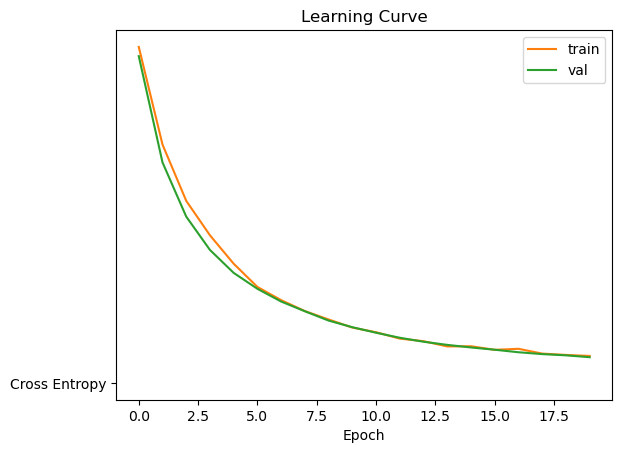

In [128]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history_model_tuned.history['loss'],label='train')
plt.plot(history_model_tuned.history['val_loss'],label='val')
plt.legend()
plt.show()

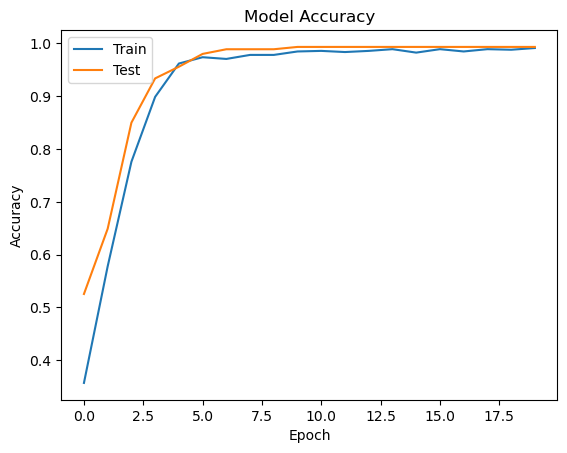

In [129]:
plt.figure()
plt.plot(history_model_tuned.history['accuracy'])
plt.plot(history_model_tuned.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()